In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
data = pd.read_csv('./data/historical_crypto_returns.csv')
# target - future log returns
data.head()

,ticker,time,low,high,open,close,volume,timestamp,date,target
0,ADA-USD,2021-03-18 12:00:00,1.2390,1.8800,1.6551,1.2902,77488617.65,2021-03-18 12:00:00,2021-03-18,-0.047783
1,ADA-USD,2021-03-18 18:00:00,1.2155,1.3180,1.2902,1.2300,34896247.02,2021-03-18 18:00:00,2021-03-18,0.027663
2,ADA-USD,2021-03-19 00:00:00,1.1808,1.2645,1.2311,1.2645,20370583.18,2021-03-19 00:00:00,2021-03-19,-0.003803
3,ADA-USD,2021-03-19 06:00:00,1.2348,1.2892,1.2645,1.2597,8217222.94,2021-03-19 06:00:00,2021-03-19,0.006331
4,ADA-USD,2021-03-19 12:00:00,1.2515,1.3010,1.2600,1.2677,13238040.79,2021-03-19 12:00:00,2021-03-19,0.030989


In [3]:
data["ticker"].unique()

array(['ADA-USD', 'BTC-USD', 'ETH-USD', 'LINK-USD', 'SOL-USD'],
      dtype=object)

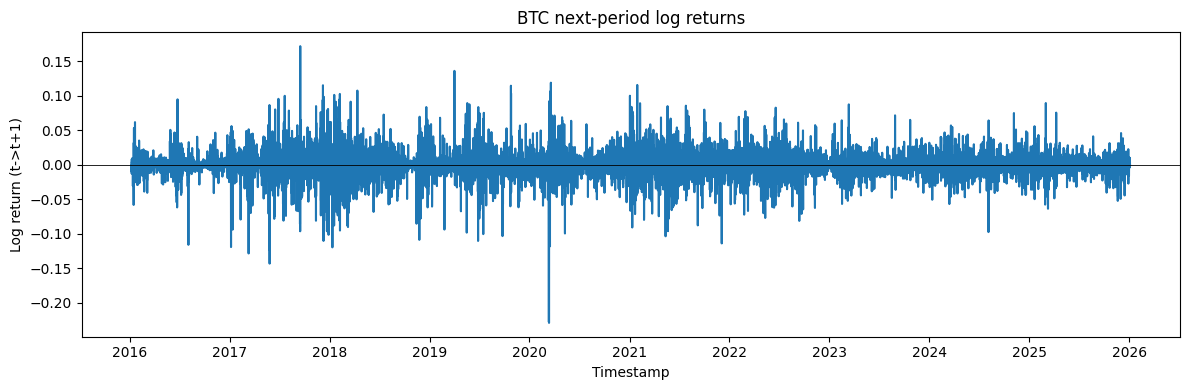

In [4]:
btc_data = data[data["ticker"] == "BTC-USD"]
btc_data = btc_data.sort_values('timestamp').reset_index(drop=True)

# ensure timestamp is datetime
btc_data['timestamp'] = pd.to_datetime(btc_data['timestamp'])

# line plot of next-period log returns
plt.figure(figsize=(12,4))
sns.lineplot(data=btc_data, x='timestamp', y='target')
plt.title('BTC next-period log returns')
plt.xlabel('Timestamp')
plt.ylabel('Log return (t->t+1)')
plt.axhline(0, color='k', linewidth=0.6)
plt.tight_layout()
plt.show()

## Stationarity Test

1. Augmented Dickey Fuller test
2. Kpss test

Looks like time series for future log returns is stationary for all tickers

In [5]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(series, alpha=0.05):
    # p_val <0.05 => stationary
    result = adfuller(series.dropna(), autolag="AIC")
    stat, pval, lags, nobs, crit, _ = result
    
    return {
        "test": "ADF",
        "statistic": stat,
        "p_value": pval,
        "lags": lags,
        "n_obs": nobs,
        "stationary": pval < alpha
    }

def kpss_test(series, alpha=0.05, regression="c"):
    # p_val >=0.05 => stationary
    stat, pval, lags, crit = kpss(
        series.dropna(),
        regression=regression,  # "c" = level, "ct" = trend
        nlags="auto"
    )
    
    return {
        "test": "KPSS",
        "statistic": stat,
        "p_value": pval,
        "lags": lags,
        "stationary": pval >= alpha
    }


In [6]:
tickers = ['ADA-USD', 'BTC-USD', 'ETH-USD', 'LINK-USD', 'SOL-USD']

for ticker in tickers:
    data_ticker = data[data['ticker'] == ticker]
    adf_res = adf_test(data_ticker['target'])
    kpss_res = kpss_test(data_ticker['target'])
    print(f"Ticker: {ticker}")
    print(f"  ADF Test: Statistic={adf_res['statistic']:.4f}, p-value={adf_res['p_value']:.4f}, Stationary={adf_res['stationary']}")
    print(f"  KPSS Test: Statistic={kpss_res['statistic']:.4f}, p-value={kpss_res['p_value']:.4f}, Stationary={kpss_res['stationary']}")        

/var/folders/4f/rv584l993wd9yrk0tn8zfktm0000gn/T/ipykernel_2137/1681232052.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pval, lags, crit = kpss(


Ticker: ADA-USD
  ADF Test: Statistic=-45.6131, p-value=0.0000, Stationary=True
  KPSS Test: Statistic=0.0861, p-value=0.1000, Stationary=True


/var/folders/4f/rv584l993wd9yrk0tn8zfktm0000gn/T/ipykernel_2137/1681232052.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pval, lags, crit = kpss(


Ticker: BTC-USD
  ADF Test: Statistic=-45.5377, p-value=0.0000, Stationary=True
  KPSS Test: Statistic=0.2040, p-value=0.1000, Stationary=True


/var/folders/4f/rv584l993wd9yrk0tn8zfktm0000gn/T/ipykernel_2137/1681232052.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pval, lags, crit = kpss(


Ticker: ETH-USD
  ADF Test: Statistic=-17.1605, p-value=0.0000, Stationary=True
  KPSS Test: Statistic=0.2503, p-value=0.1000, Stationary=True
Ticker: LINK-USD
  ADF Test: Statistic=-45.6317, p-value=0.0000, Stationary=True
  KPSS Test: Statistic=0.1183, p-value=0.1000, Stationary=True
Ticker: SOL-USD
  ADF Test: Statistic=-41.6591, p-value=0.0000, Stationary=True
  KPSS Test: Statistic=0.1329, p-value=0.1000, Stationary=True


/var/folders/4f/rv584l993wd9yrk0tn8zfktm0000gn/T/ipykernel_2137/1681232052.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pval, lags, crit = kpss(
/var/folders/4f/rv584l993wd9yrk0tn8zfktm0000gn/T/ipykernel_2137/1681232052.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pval, lags, crit = kpss(


### Autocovariance

* No strong autocovariance with any lagged value.
* Good for ARMA type models

In [7]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acovf

def plot_autocovariance(series, max_lag=40):
    gamma = acovf(series.dropna(), fft=True, nlag=max_lag)
    
    plt.figure(figsize=(8,4))
    plt.stem(range(len(gamma)), gamma)
    plt.xlabel("Lag")
    plt.ylabel("Autocovariance")
    plt.title("Autocovariance Plot")
    plt.show()


Autocovariance for ADA-USD:


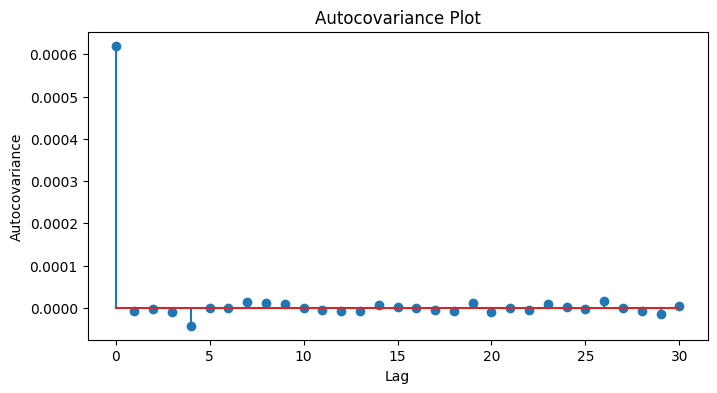

Autocovariance for BTC-USD:


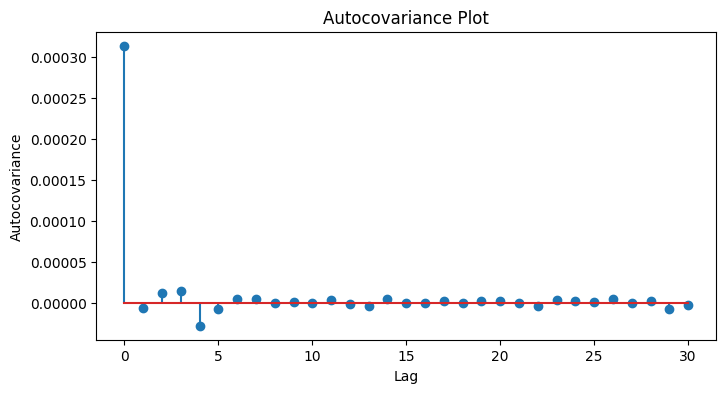

Autocovariance for ETH-USD:


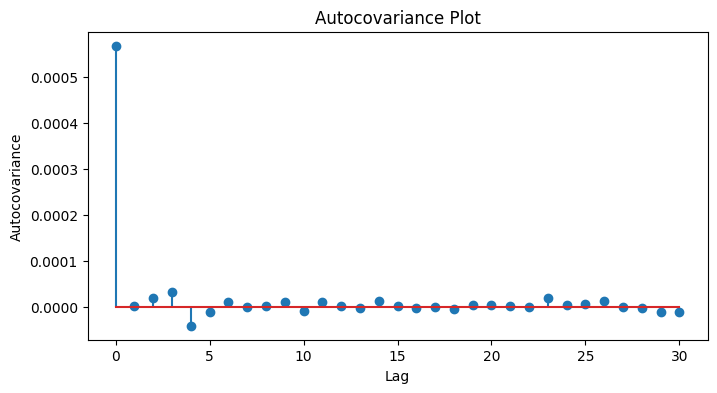

Autocovariance for LINK-USD:


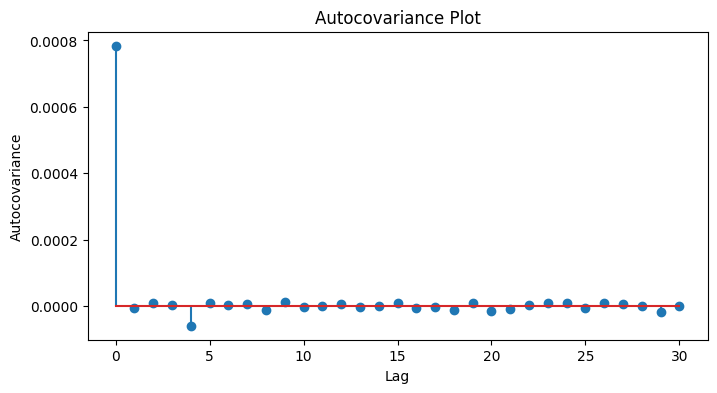

Autocovariance for SOL-USD:


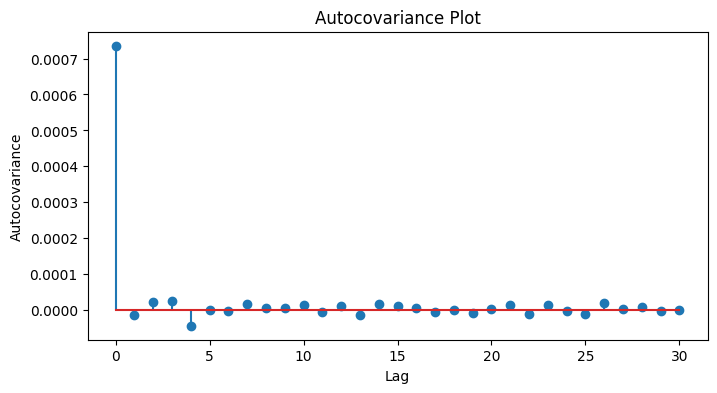

In [8]:
for ticker in tickers:
    data_ticker = data[data['ticker'] == ticker]
    returns = data_ticker['target']
    print(f"Autocovariance for {ticker}:")
    plot_autocovariance(returns, max_lag=30)


### Autocorrelation

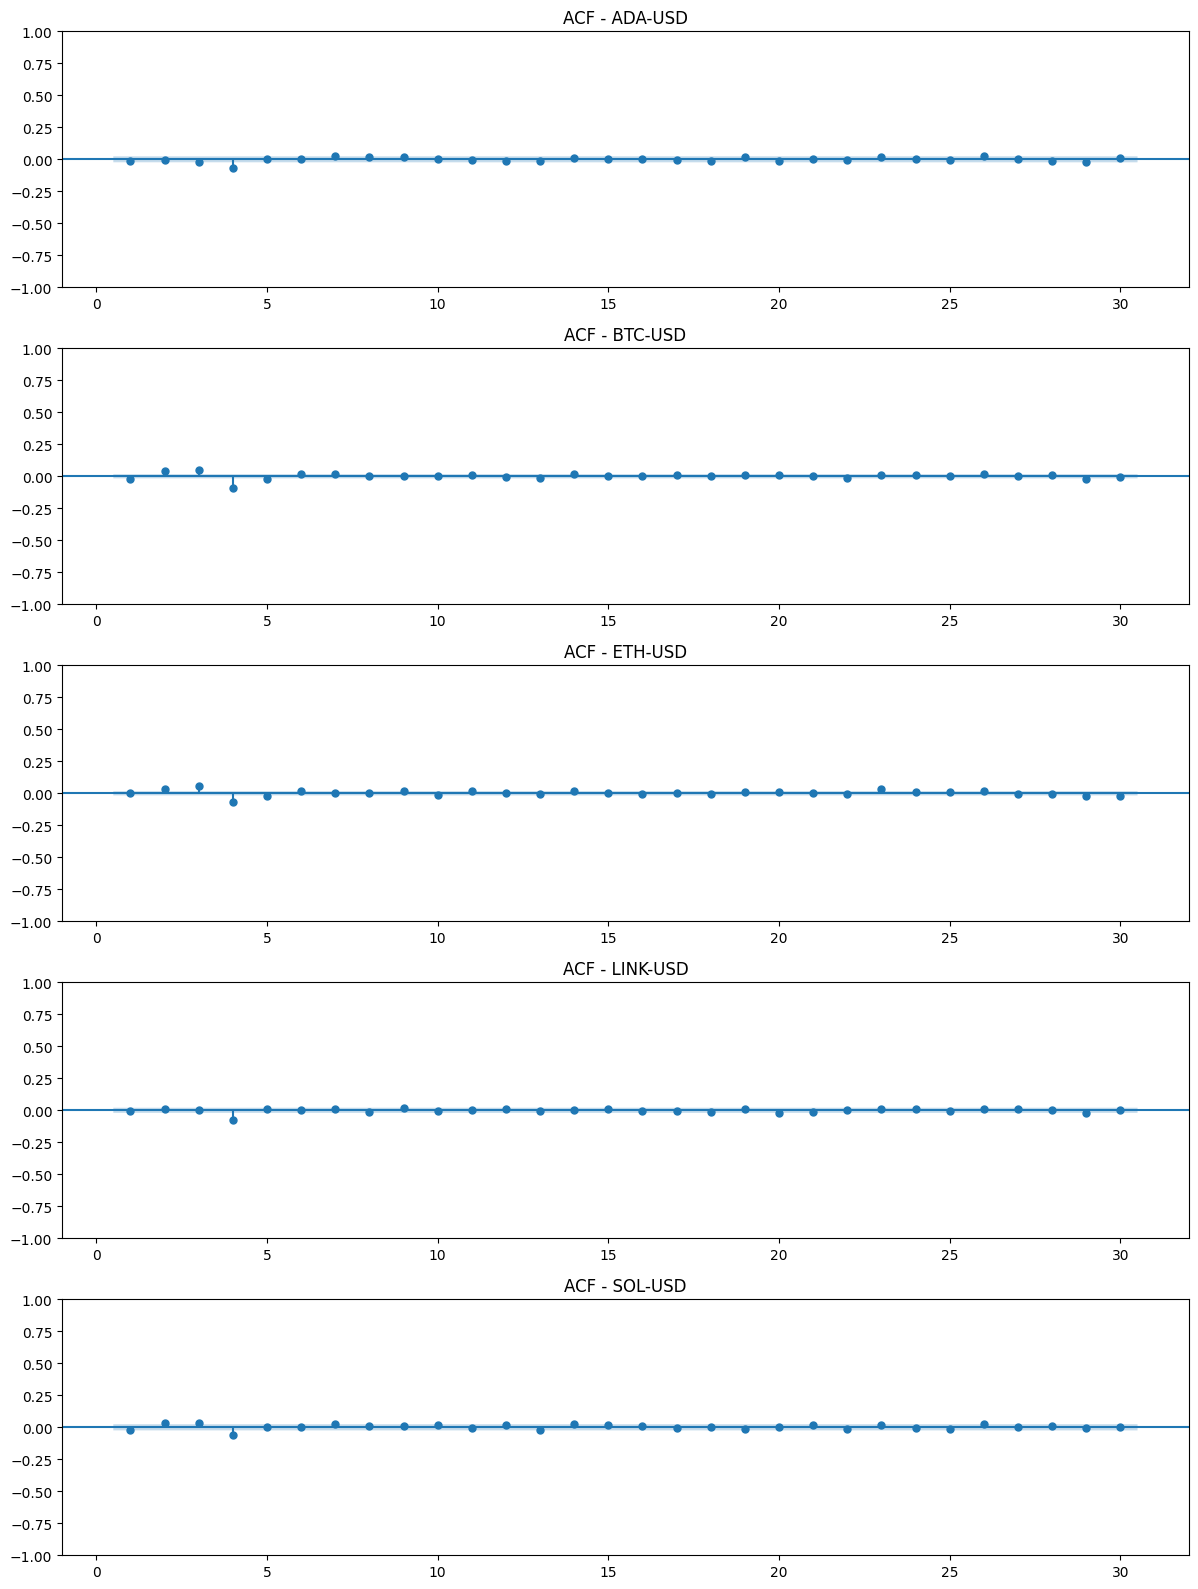

In [10]:
fig, axes = plt.subplots(len(tickers), 1, figsize=(12, 16))
for i, ticker in enumerate(tickers):
    data_ticker = data[data['ticker'] == ticker]
    plot_acf(data_ticker['target'].dropna(), lags=30, ax=axes[i], zero=False)
    axes[i].set_title(f'ACF - {ticker}')
plt.tight_layout()
plt.show()

### Possible features

1. day of month
2. day of year
3. cyclic features
4. day of week
5. holiday? weekend?
6. rolling mean of close, open, mid price for past 5, 10, 15 days
7. volatility in the past 5,10,15 days
8. avg returns in the past 5,10, 15 days
9. Correlation related features?
10. Time quarter of the day
11. Entropy
12. Momentum


### Analysis

1. correlation/covariance between currencies
2. stationarity check
3. autocovariance / autocorrelation
4. structural break - regime detection

### Steps

1. train / val / test split
2. feature engineering
3. modelling
4. test data set